In [4]:
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt


In [12]:
# stock data API alpha_vantage, documentation https://www.alphavantage.co/documentation/
key = 'A6QPO3VBTX5UHOAU'
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

ticker='AAPL'
# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
aapl_data, aapl_meta_data = ts.get_intraday(symbol=ticker) #for intraday price, ts.get_intraday. Daily price, ts.get_daily
# aapl_sma is a dict, aapl_meta_sma also a dict
aapl_sma, aapl_meta_sma = ti.get_sma(symbol=ticker)

In [17]:
df=aapl_data
df=df.rename(columns={'1. open':'open','2. high':'high','3. low':'low', '4. close':'close', '5. volume':'volume'})
df.to_csv('priceData.csv')
#read data from the csv file
#df=pd.read_csv('priceData.csv').set_index(['date'])
df.head(15)

,open,high,low,close,volume
date,,,,,
2020-06-05 16:00:00,331.2100,331.8000,330.2000,331.6400,2317255.0
2020-06-05 15:45:00,331.4700,331.7500,331.1500,331.1800,1188071.0
2020-06-05 15:30:00,330.4400,331.5900,330.1026,331.4900,1197757.0
2020-06-05 15:15:00,330.2501,330.4700,329.8200,330.3900,622539.0
2020-06-05 15:00:00,330.1300,330.7100,330.0700,330.2450,615819.0
2020-06-05 14:45:00,330.0200,330.2400,329.2500,330.1500,849819.0
2020-06-05 14:30:00,329.8700,330.5500,329.7200,330.0200,635363.0
2020-06-05 14:15:00,330.3000,330.6900,329.7900,329.8510,636712.0
2020-06-05 14:00:00,330.8750,330.9900,330.1371,330.3100,527479.0


In [46]:
dfRatio = df[['open','high', 'low','close']]/df['open'].iloc[-1]
dfRatio['highOpen']=dfRatio['high']/dfRatio['open']-1
dfRatio['lowOpen']=dfRatio['low']/dfRatio['open']-1
dfRatio['closeOpen']=dfRatio['close']/dfRatio['open']-1
dfRatio['MA5']=dfRatio['open'].rolling(window=5).mean().shift(-4)
dfRatio.to_csv('priceDataRatio.csv')
#read data from the csv file
#df=pd.read_csv('priceDataRatio.csv').set_index(['date'])
dfRatio

,open,high,low,close,highOpen,lowOpen,closeOpen,MA5
date,,,,,,,,
2020-06-05 16:00:00,1.028602,1.030435,1.025466,1.029938,0.001781,-0.003049,0.001298,1.027019
2020-06-05 15:45:00,1.029410,1.030280,1.028416,1.028509,0.000845,-0.000965,-0.000875,1.026280
2020-06-05 15:30:00,1.026211,1.029783,1.025163,1.029472,0.003480,-0.001021,0.003178,1.025286
2020-06-05 15:15:00,1.025621,1.026304,1.024286,1.026056,0.000666,-0.001302,0.000424,1.025199
2020-06-05 15:00:00,1.025248,1.027050,1.025062,1.025606,0.001757,-0.000182,0.000348,1.025587
...,...,...,...,...,...,...,...,...
2020-06-02 11:45:00,0.991661,0.995062,0.990963,0.994068,0.003429,-0.000705,0.002427,0.994891
2020-06-02 11:30:00,0.990839,0.993509,0.990466,0.991663,0.002696,-0.000376,0.000832,NaN
2020-06-02 11:15:00,0.995280,0.995497,0.990683,0.990978,0.000218,-0.004618,-0.004322,NaN


<Figure size 432x288 with 0 Axes>

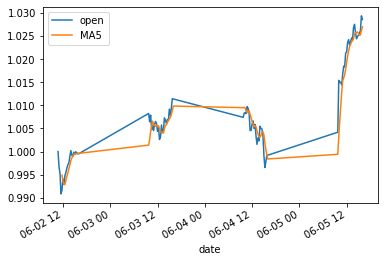

In [47]:
plt.figure(); dfRatio.plot(y=['open','MA5']); plt.legend(loc='best')
#the figure has datetime gaps, but the MA works 

In [45]:
import plotly.graph_objects as go

dfChart = dfRatio

fig = go.Figure(data=[go.Candlestick(x=dfChart.index,
                open=dfChart['open'], high=dfChart['high'],
                low=dfChart['low'], close=dfChart['close'])
                     ])

#add xaxis_type='category' and fig.update_xaxes(autorange="reversed") to remove the datetime gaps
fig.update_layout(xaxis_type='category', xaxis_rangeslider_visible=False, title_text=ticker)
fig.update_xaxes(autorange="reversed")
fig.show()